In [2]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [3]:
## import data
train_df = pd.read_csv("train.csv")

In [4]:
## EDA - Exploratory Data Analysis

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7647,8159_01,Earth,False,F/1687/P,NaN,26.0,False,0.0,0.0,0.0,622.0,8.0,Blancy Guerson,False
254,0282_01,Earth,False,F/54/S,TRAPPIST-1e,21.0,False,0.0,918.0,0.0,0.0,0.0,Valex Baketton,True
7272,7777_01,Earth,True,G/1249/P,PSO J318.5-22,21.0,False,0.0,0.0,0.0,0.0,0.0,Camie Meleon,True
2614,2798_01,Europa,False,A/23/P,TRAPPIST-1e,37.0,False,6.0,437.0,NaN,54.0,3030.0,Furudra Timleplet,False
2848,3073_01,Mars,True,F/640/P,TRAPPIST-1e,36.0,False,0.0,0.0,0.0,0.0,0.0,Krios Shbre,True


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [11]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


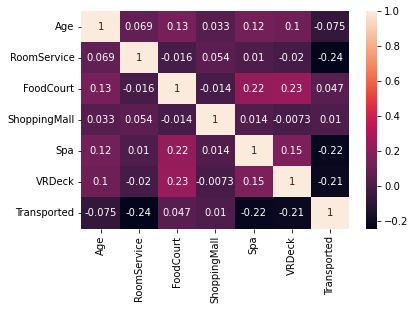

In [12]:
sbn.heatmap(train_df.corr(), annot = True);

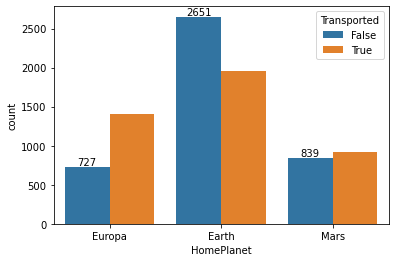

In [13]:
ax = sbn.countplot(x = train_df["HomePlanet"], hue = train_df["Transported"])
ax.bar_label(ax.containers[0]);

In [14]:
train_df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

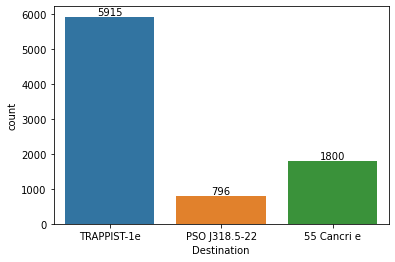

In [15]:
bx = sbn.countplot(x = train_df["Destination"])
bx.bar_label(bx.containers[0]);

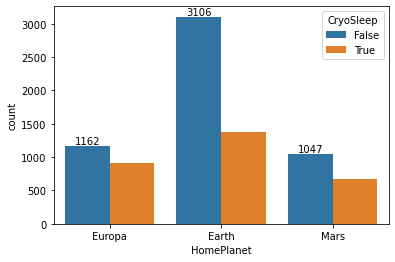

In [16]:
cx = sbn.countplot(x = train_df["HomePlanet"], hue = train_df["CryoSleep"])
cx.bar_label(cx.containers[0]);

### Feature

In [17]:
train_df.Transported.value_counts()  ## bool

True     4378
False    4315
Name: Transported, dtype: int64

In [18]:
train_df["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [19]:
d = {True : 1, False : 0}

In [20]:
train_df["CryoSleep"] = train_df["CryoSleep"].map(d)

In [21]:
train_df["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [22]:
#d2 = {False : 0, True : 1}

In [23]:
#train_df["VIP"] = train_df["VIP"].map(d)  >> neden oluyor anlamadım.
#for i in range(0, len(train_df["VIP"])):
#    if(train_df.["VIP"] == "False"):
#        train_df["VIP"] = 0
#    else:
#        train_df["VIP"] = 1

In [24]:
train_df = train_df.drop(["PassengerId", "Cabin", "VIP", "Name"], axis = 1)

In [25]:
train_df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [26]:
Age_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")  ## for age
Age = train_df[["Age"]].values
Age_mean = Age_mean.fit(Age[:, :1])
Age[:, :1] = Age_mean.transform(Age[:, :1])

train_df[["Age"]] = Age



c_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## for cryosleep
c = train_df[["CryoSleep"]].values
c_mean = c_mean.fit(Age[:, :1])
c[:, :1] = c_mean.transform(c[:, :1])

train_df[["CryoSleep"]] = c



r_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## RoomService
r = train_df[["RoomService"]].values
r_mean = r_mean.fit(r[:, :1])
r[:, :1] = r_mean.transform(r[:, :1])

train_df[["RoomService"]] = r


f_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## FoodCourt
f = train_df[["FoodCourt"]].values
f_mean = f_mean.fit(f[:, :1])
f[:, :1] = f_mean.transform(f[:, :1])

train_df[["FoodCourt"]] = f




s_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## ShoppingMall
s = train_df[["ShoppingMall"]].values
s_mean = s_mean.fit(s[:, :1])
s[:, :1] = s_mean.transform(s[:, :1])

train_df[["ShoppingMall"]] = Age



sp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## Spa
sp = train_df[["Spa"]].values
sp_mean = sp_mean.fit(sp[:, :1])
sp[:, :1] = sp_mean.transform(sp[:, :1])

train_df[["Spa"]] = sp




v_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## VRDeck
v = train_df[["VRDeck"]].values
v_mean = v_mean.fit(v[:, :1])
v[:, :1] = v_mean.transform(v[:, :1])

train_df[["VRDeck"]] = v

In [27]:
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])

In [28]:
train_df = pd.get_dummies(train_df, drop_first = True) 

In [29]:
train_df.isnull().sum()


CryoSleep                    0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [30]:
train_df

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,39.0,0.0,0.0,39.0,0.0,0.0,False,1,0,0,1
1,0.0,24.0,109.0,9.0,24.0,549.0,44.0,True,0,0,0,1
2,0.0,58.0,43.0,3576.0,58.0,6715.0,49.0,False,1,0,0,1
3,0.0,33.0,0.0,1283.0,33.0,3329.0,193.0,False,1,0,0,1
4,0.0,16.0,303.0,70.0,16.0,565.0,2.0,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,41.0,0.0,6819.0,41.0,1643.0,74.0,False,1,0,0,0
8689,1.0,18.0,0.0,0.0,18.0,0.0,0.0,False,0,0,1,0
8690,0.0,26.0,0.0,0.0,26.0,1.0,0.0,True,0,0,0,1
8691,0.0,32.0,0.0,1049.0,32.0,353.0,3235.0,False,1,0,0,0


In [31]:
y = train_df["Transported"]
x = train_df.drop("Transported", axis = 1)

In [32]:
def class_model(x, y):
    lr = LogisticRegression()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier(criterion = "log_loss") # "gini", "entropy", "log_loss"
    g = GaussianNB()
    b = BernoulliNB()
    s = SVC(kernel = "rbf")  #'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [lr, knn, dt, g, b, s]
    model_names = ["Logistic_Regression", "KNN", "Decision", "Gaussian", "Bernoulli", "Support"]
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 0)
    #x_train = MinMaxScaler().fit_transform(x_train)
    #x_test = MinMaxScaler().fit_transform(x_test)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    acc_score = []
    conf_mat = []
    
    result = pd.DataFrame(columns = ["Accuracy"], index = model_names)
    
    for fit_model in models:
        y_pred = fit_model.fit(x_train, y_train).predict(x_test)
        acc_score.append(accuracy_score(y_true, y_pred))
        #conf_mat.append(confusion_matrix(y_true, y_pred))
        
    result["Accuracy"] = acc_score
    #result["Confusion"] = conf_mat
    
    return result.sort_values("Accuracy", ascending = False)
    

In [33]:
class_model(x, y)  # in this dataset support VM has best score : 0.7837

,Accuracy
Support,0.783784
Logistic_Regression,0.782634
KNN,0.755032
Bernoulli,0.753882
Decision,0.721104
Gaussian,0.668775


In [34]:
deneme = pd.read_csv("train.csv")
deneme.corr()["Transported"]

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

In [35]:
deneme = deneme.drop(["PassengerId"], axis = 1)

In [36]:
deneme.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
deneme = deneme.drop(["Cabin", "Destination", "Name", "ShoppingMall", "FoodCourt", "Age", "VIP", "CryoSleep"], axis = 1)

In [38]:
deneme

,HomePlanet,RoomService,Spa,VRDeck,Transported
0,Europa,0.0,0.0,0.0,False
1,Earth,109.0,549.0,44.0,True
2,Europa,43.0,6715.0,49.0,False
3,Europa,0.0,3329.0,193.0,False
4,Earth,303.0,565.0,2.0,True
...,...,...,...,...,...
8688,Europa,0.0,1643.0,74.0,False
8689,Earth,0.0,0.0,0.0,False
8690,Earth,0.0,1.0,0.0,True
8691,Europa,0.0,353.0,3235.0,False


In [39]:
deneme.isnull().sum()

HomePlanet     201
RoomService    181
Spa            183
VRDeck         188
Transported      0
dtype: int64

In [40]:
deneme['HomePlanet'] = deneme['HomePlanet'].fillna(deneme['HomePlanet'].mode()[0])

In [41]:

r_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## RoomService
r = deneme[["RoomService"]].values
r_mean = r_mean.fit(r[:, :1])
r[:, :1] = r_mean.transform(r[:, :1])

deneme[["RoomService"]] = r



sp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## Spa
sp = deneme[["Spa"]].values
sp_mean = sp_mean.fit(sp[:, :1])
sp[:, :1] = sp_mean.transform(sp[:, :1])

deneme[["Spa"]] = sp




v_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")   ## VRDeck
v = deneme[["VRDeck"]].values
v_mean = v_mean.fit(v[:, :1])
v[:, :1] = v_mean.transform(v[:, :1])

deneme[["VRDeck"]] = v

In [42]:
deneme.isnull().sum()

HomePlanet     0
RoomService    0
Spa            0
VRDeck         0
Transported    0
dtype: int64

In [43]:
deneme = pd.get_dummies(deneme, drop_first = True)

In [44]:
deneme.corr()["Transported"]

RoomService         -0.242048
Spa                 -0.218791
VRDeck              -0.204825
Transported          1.000000
HomePlanet_Europa    0.176916
HomePlanet_Mars      0.019544
Name: Transported, dtype: float64

In [45]:
y1 = deneme["Transported"]
x1 = deneme.drop("Transported", axis = 1)

In [46]:
#for i in range(0, 100):
#    z1, z2, z3, z4 = train_test_split(x1, y1, test_size = 0.3, random_state = i)
#    z1 = StandardScaler().fit_transform(z1)
#    z2 = StandardScaler().fit_transform(z2)
#    s1 = SVC(kernel = "rbf")
#    s1.fit(z1, z3)
#    pred = s1.predict(z2)
#    accuracy_score(z4, pred)

In [47]:
z1, z2, z3, z4 = train_test_split(x1, y1, test_size = 0.3, random_state = 0)
z1 = StandardScaler().fit_transform(z1)
z2 = StandardScaler().fit_transform(z2)
s1 = SVC(kernel = "rbf")
s1.fit(z1, z3)
pred = s1.predict(z2)
accuracy_score(z4, pred)

0.7806748466257669

In [51]:
pd.read_csv("test.csv").isnull().sum()
## ugrasamdım şimdilik çok eksik veri var cunku

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64